# Customer Personality Analysis

# Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [88]:

filepath = 'marketing_campaign.csv'
data = pd.read_csv(filepath, sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


***Features:***

*People*
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise


---
*Products*
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years


---

*Promotion*
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


---

*Place*
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [89]:
#data
print(data.shape)
print(data.info())

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

In [90]:
data = data.drop(['ID'], axis=1)

In [91]:
data.duplicated().sum()

182

In [92]:
data.drop_duplicates(inplace=True)

Splitting People, Products, Promotion, and Place features for getting better insght

# People features

In [93]:
people_col = ['Year_Birth', 'Education', 'Marital_Status', 'Income',
              'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']

data_people = data[people_col]

In [94]:
data_people.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,2058.0,NaN,NaN,NaN,1968.787172,11.973898,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2058,5,Graduation,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2058,8,Married,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2034.0,NaN,NaN,NaN,52357.791544,25526.956988,1730.0,35528.25,51533.0,68480.75,666666.0
Kidhome,2058.0,NaN,NaN,NaN,0.445578,0.537556,0.0,0.0,0.0,1.0,2.0
Teenhome,2058.0,NaN,NaN,NaN,0.509232,0.546489,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2058,663,12-05-2014,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2058.0,NaN,NaN,NaN,48.951895,28.999189,0.0,24.0,49.0,74.0,99.0
Complain,2058.0,NaN,NaN,NaN,0.009718,0.098124,0.0,0.0,0.0,0.0,1.0


In [95]:
# Creating Age column based on Year Birth
current_year = dt.datetime.now().year
data_people['Age'] = data_people['Year_Birth'].apply(lambda x: current_year - x)

# dropping Year_Birth
data_people = data_people.drop(['Year_Birth'], axis=1)

In [96]:
# convert "Dt_Customer" column to datetime type
data_people['Dt_Customer'] = pd.to_datetime(data_people['Dt_Customer'], format='%d-%m-%Y')

#create the "Lifetime" column which calculates the difference in days from today
today = dt.datetime.now()
data_people['Lifetime'] = data_people['Dt_Customer'].apply(lambda x: (today - x).days)

# dropping Year_Birth
data_people = data_people.drop(['Dt_Customer'], axis=1)



> Some features have a categorical concept such as "Kidhome", "Teenhome", and "Complain'. However, these columns were presented as a nominal feature in the data frame. To get better insight, I decided to convert them to categorical-based.



In [97]:
data_people

data_people['Kidhome'] = data_people['Kidhome'].apply(lambda x: 'zero' if x==0 else 'one' if x==1
                                    else 'two' if x == 2 else 'more than 2' if x >= 3 else 'undefined')

data_people['Teenhome'] = data_people['Teenhome'].apply(lambda x: 'zero' if x==0 else 'one' if x==1
                                      else 'two' if x == 2 else 'more than 2' if x >= 3 else 'undefined')

data_people['Complain'] = data_people['Complain'].apply(lambda x: 'No' if x==0 else 'Yes')

In [98]:
data_people.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,2058,5,Graduation,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2058,8,Married,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2034.0,NaN,NaN,NaN,52357.791544,25526.956988,1730.0,35528.25,51533.0,68480.75,666666.0
Kidhome,2058,3,zero,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,2058,3,zero,1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2058.0,NaN,NaN,NaN,48.951895,28.999189,0.0,24.0,49.0,74.0,99.0
Complain,2058,2,No,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2058.0,NaN,NaN,NaN,55.212828,11.973898,28.0,47.0,54.0,65.0,131.0
Lifetime,2058.0,NaN,NaN,NaN,3893.465015,202.164291,3541.0,3720.0,3893.0,4069.0,4240.0


In [99]:
#plotting setup
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 100
plt.style.use('Solarize_Light2')

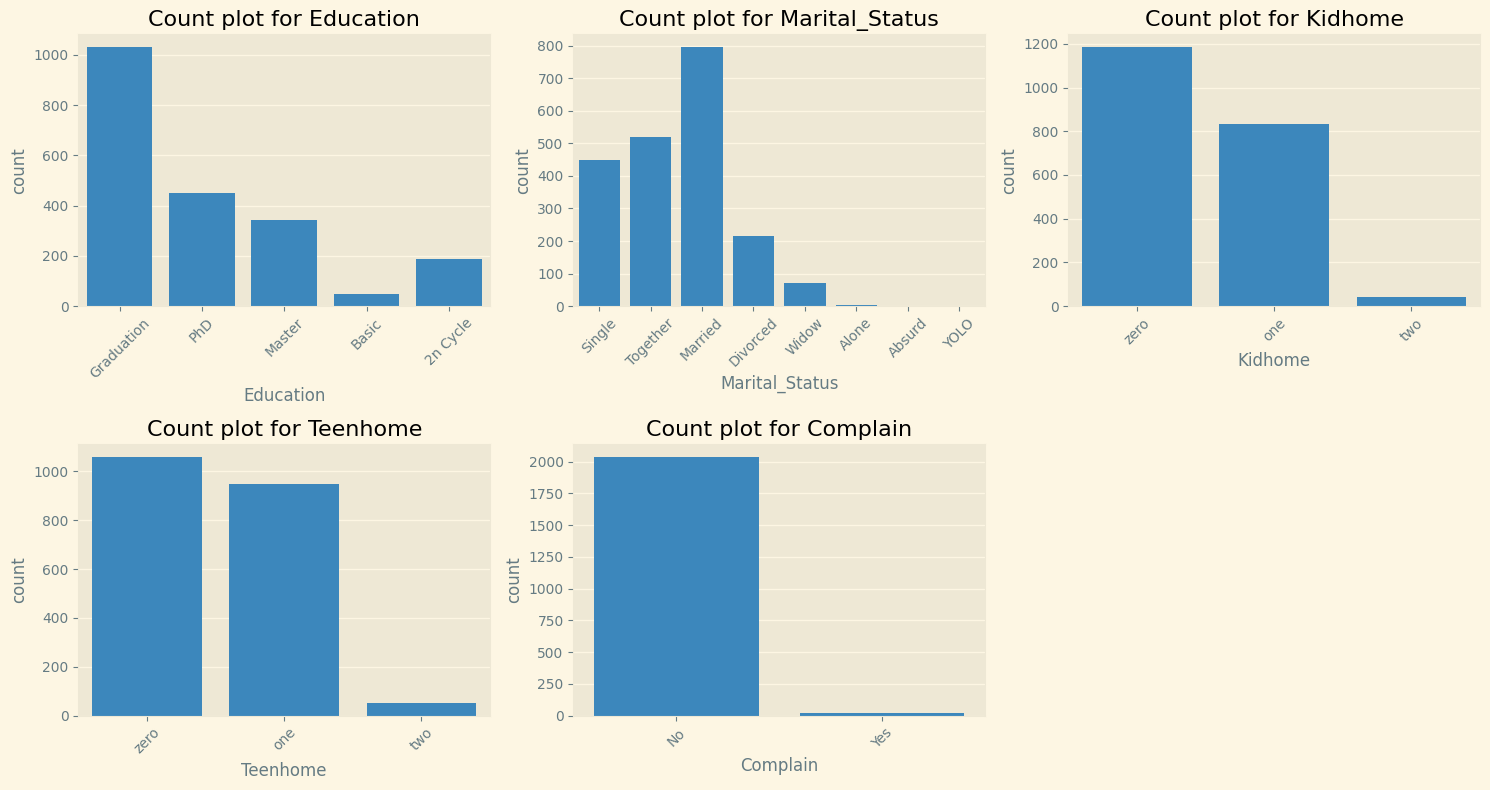

In [100]:
# count plot for nominal features
nominal_columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']  # replace with your nominal columns

numerical_columns = [] # ['Income', 'Recency', 'Age', 'Lifetime']  # replace with your numerical columns

# Set up the matplotlib figure
num_plots = len(nominal_columns) + len(numerical_columns)
num_cols = 3  # You can decide how many columns of subplots you want
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(num_cols * 5, num_rows * 4))


# Creating subplots for nominal columns
for i, column in enumerate(nominal_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, data=data_people)
    plt.title(f'Count plot for {column}')
    plt.xticks(rotation=45)  # Rotate the x labels if they overlap

'''
# Creating subplots for numerical columns: you may need to bin the numerical columns
for i, column in enumerate(numerical_columns, 1 + len(nominal_columns)):
    plt.subplot(num_rows, num_cols, i)
    # For numerical columns, let's bin them and then count (like a histogram)
    # Convert the numerical column to categorical bins
    data = pd.cut(data_people[column], bins=10)  # Adjust bins as needed
    sns.countplot(x=data)
    plt.title(f'Count plot for binned {column}')
    plt.xticks(rotation=45)  # Rotate the x labels if they overlap
'''
plt.tight_layout()
plt.show()

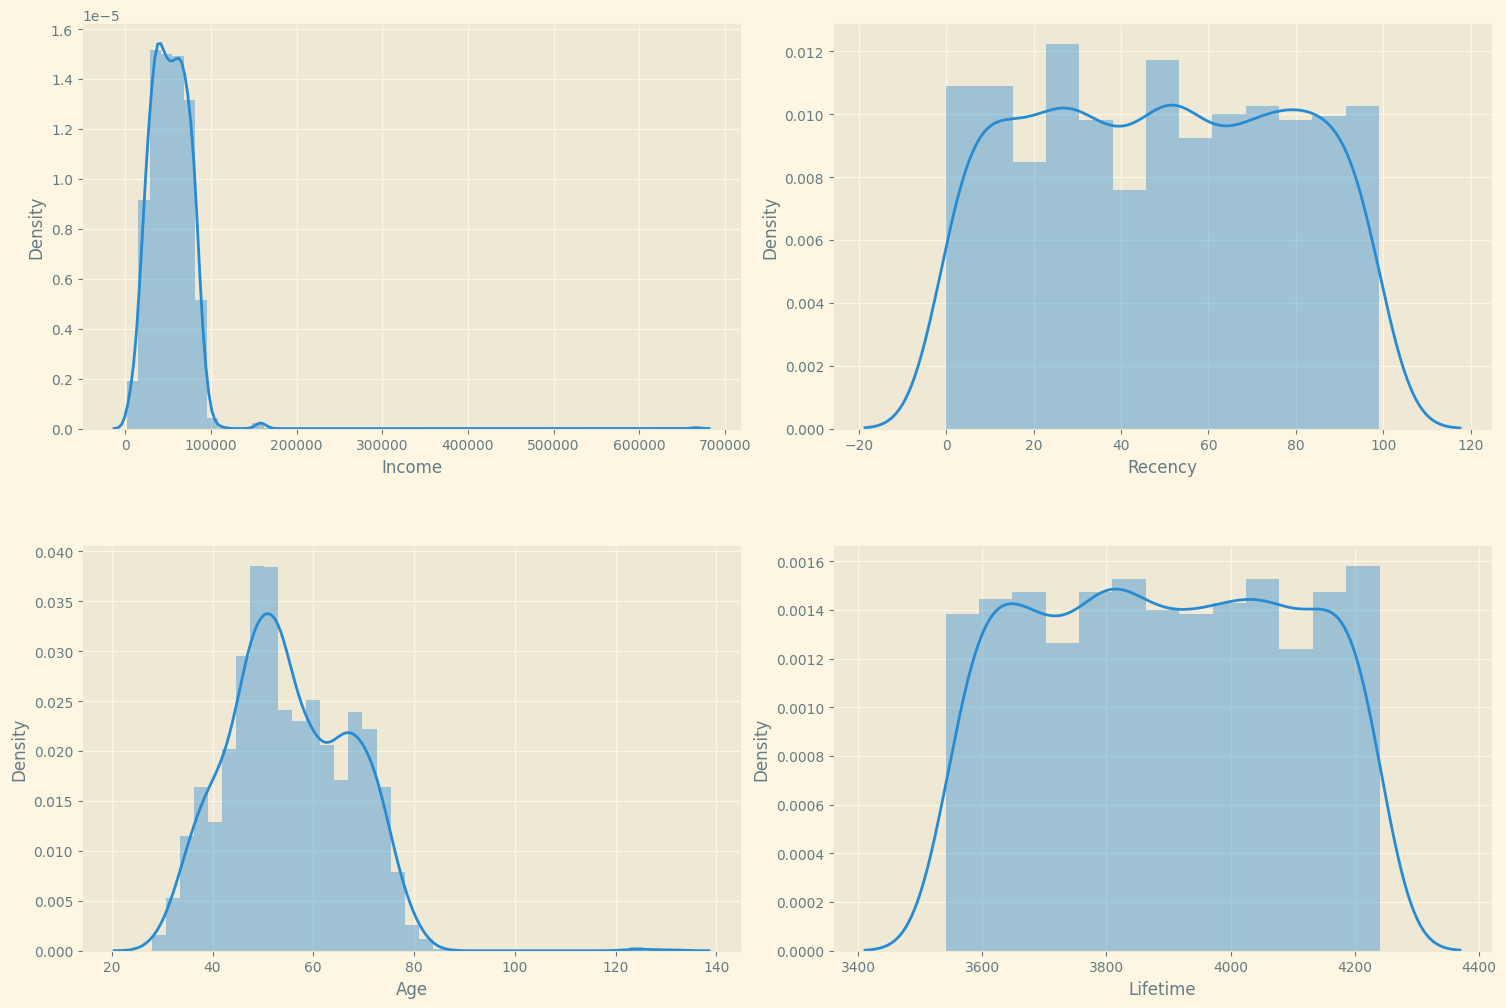

In [101]:
# distribution plot for numerical features
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
index = 0
axs = axs.flatten()
numerical_columns = ['Income', 'Recency', 'Age', 'Lifetime']
for k, v in data_people[numerical_columns].items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

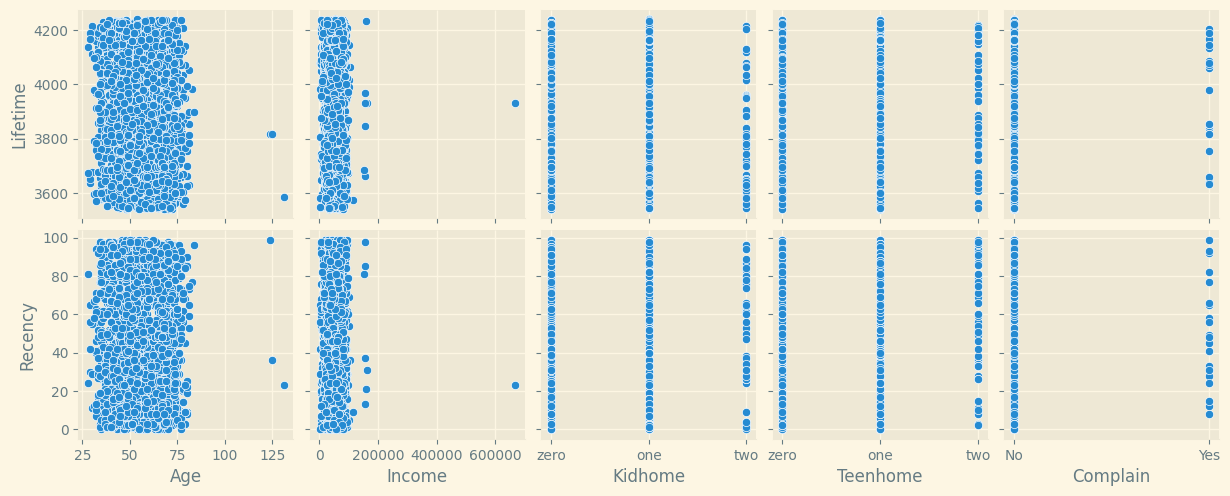

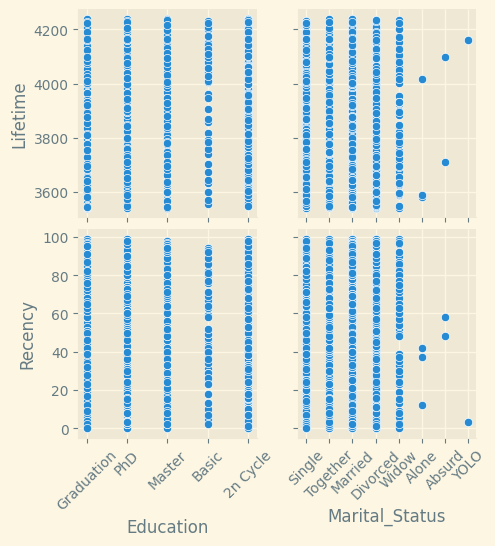

In [102]:
# pair plot
h = sns.pairplot(data_people,
                 x_vars=["Age", "Income", "Kidhome", "Teenhome", "Complain"],
                 y_vars=["Lifetime", "Recency"])
plt.show()

g = sns.pairplot(data_people,
                 x_vars=["Education", "Marital_Status"],
                 y_vars=["Lifetime", "Recency"])
# Rotate x-axis labels for each subplot
for ax in g.axes.flatten():
    # Check if the axes is not empty
    if ax:
        # Rotate label for x-axis of each plot in the pair plot
        plt.setp(ax.get_xticklabels(), rotation=45)

## Filling null values in data_people

In [103]:
data_people.isna().sum()

Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Recency            0
Complain           0
Age                0
Lifetime           0
dtype: int64

Because Income feature has skweed distribution. null values should been filled with median

In [104]:
# data_people['Income']=data_people['Income'].fillna(data_people['Income'].median())
# or


# compute median and std of `Income`
Income_median = data_people['Income'].mean()
Income_std = data_people['Income'].std()

# number of NaN in `Item_Weight` column
num_na = data_people['Income'].isna().sum()

# generate `num_na` samples from N(Income_median, Income_std**2) distribution
rand_vals = Income_median + Income_std * np.random.RandomState(42).randn(num_na)
# -------------------------------------------------------------------------------------------------------------------------------------
# since lower values from Income.min do not make sense, I decided to replace these values of rand_vals with Income.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data_people['Income'].min():
        rand_vals[num] = data_people['Income'].min()
    num += 1

# replace missing values with `rand_vals`
data_people.loc[data_people['Income'].isna(), 'Income'] = rand_vals


In [105]:
data_people.isna().sum()

Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Recency           0
Complain          0
Age               0
Lifetime          0
dtype: int64

## Scaling data_people

In [106]:
# MinMax Scaler
mms = MinMaxScaler()

numerical_columns = ['Income', 'Recency', 'Age', 'Lifetime']
for col in data_people[numerical_columns].columns:
    data_people[col] = mms.fit_transform(data_people[[col]]).squeeze()

In [107]:
data_people = pd.get_dummies(data_people, drop_first=True)

# Product features

In [108]:
product_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

data_product = data[product_col]

In [109]:
data_product.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MntWines,2058.0,303.921769,336.528217,0.0,23.0,174.0,504.00,1493.0
MntFruits,2058.0,26.234694,39.750728,0.0,1.0,8.0,33.00,199.0
MntMeatProducts,2058.0,167.704568,228.303238,0.0,16.0,67.0,229.50,1725.0
MntFishProducts,2058.0,37.329446,54.657215,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2058.0,27.176871,41.714004,0.0,1.0,8.0,33.75,263.0
MntGoldProds,2058.0,43.873178,52.126598,0.0,9.0,24.0,56.00,362.0


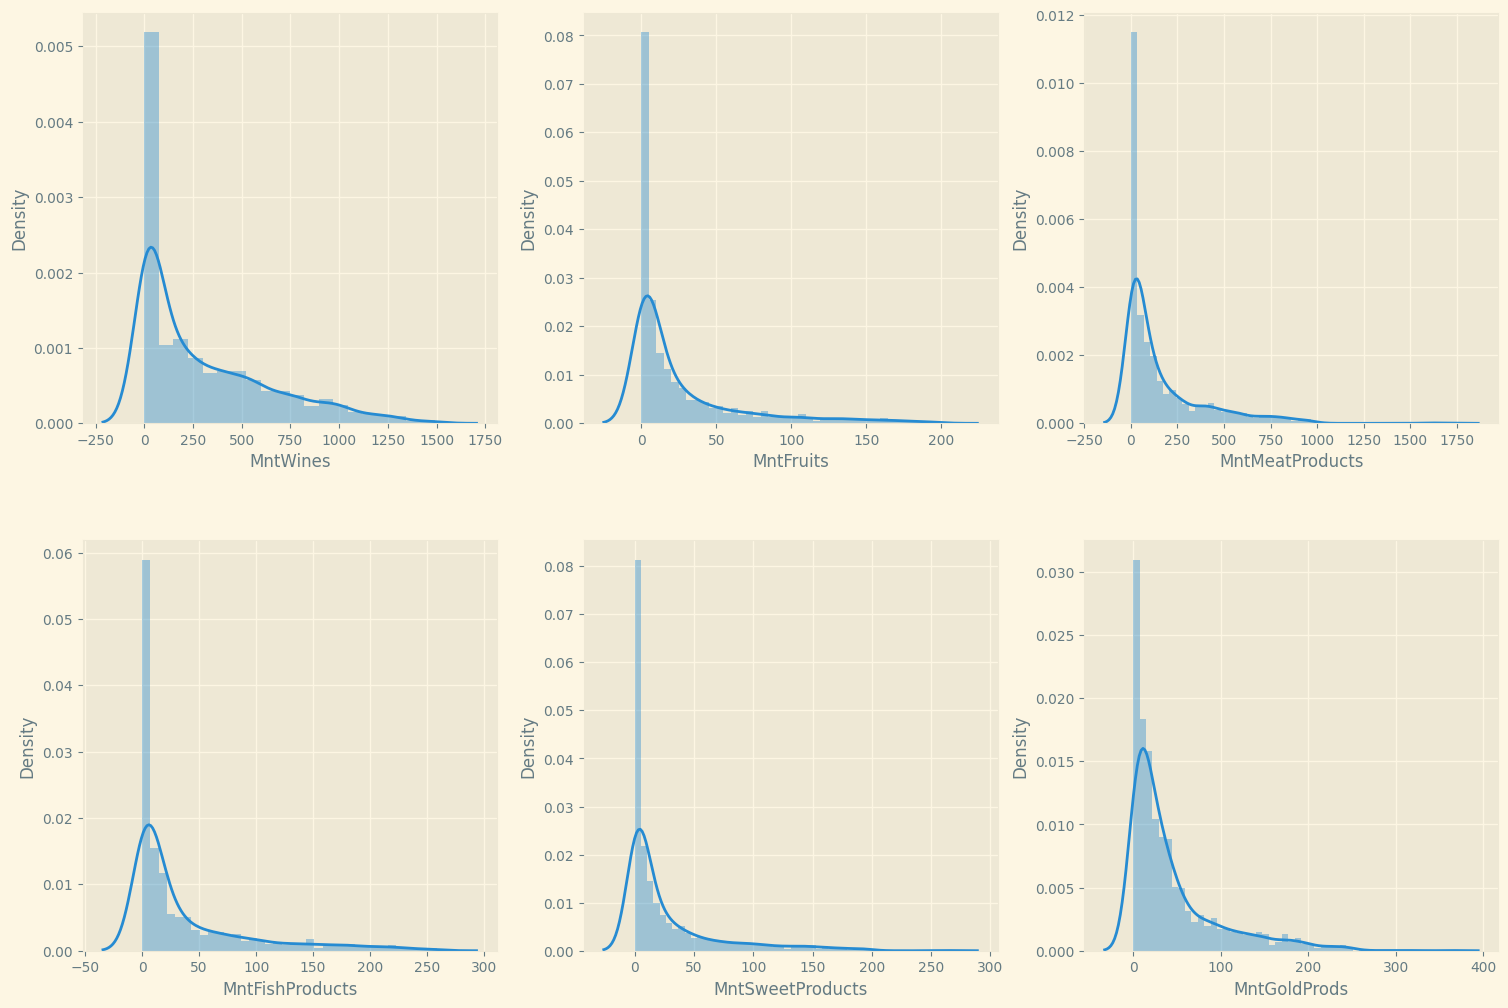

In [110]:
# distribution plot for numerical features
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
index = 0
axs = axs.flatten()
for k, v in data_product.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

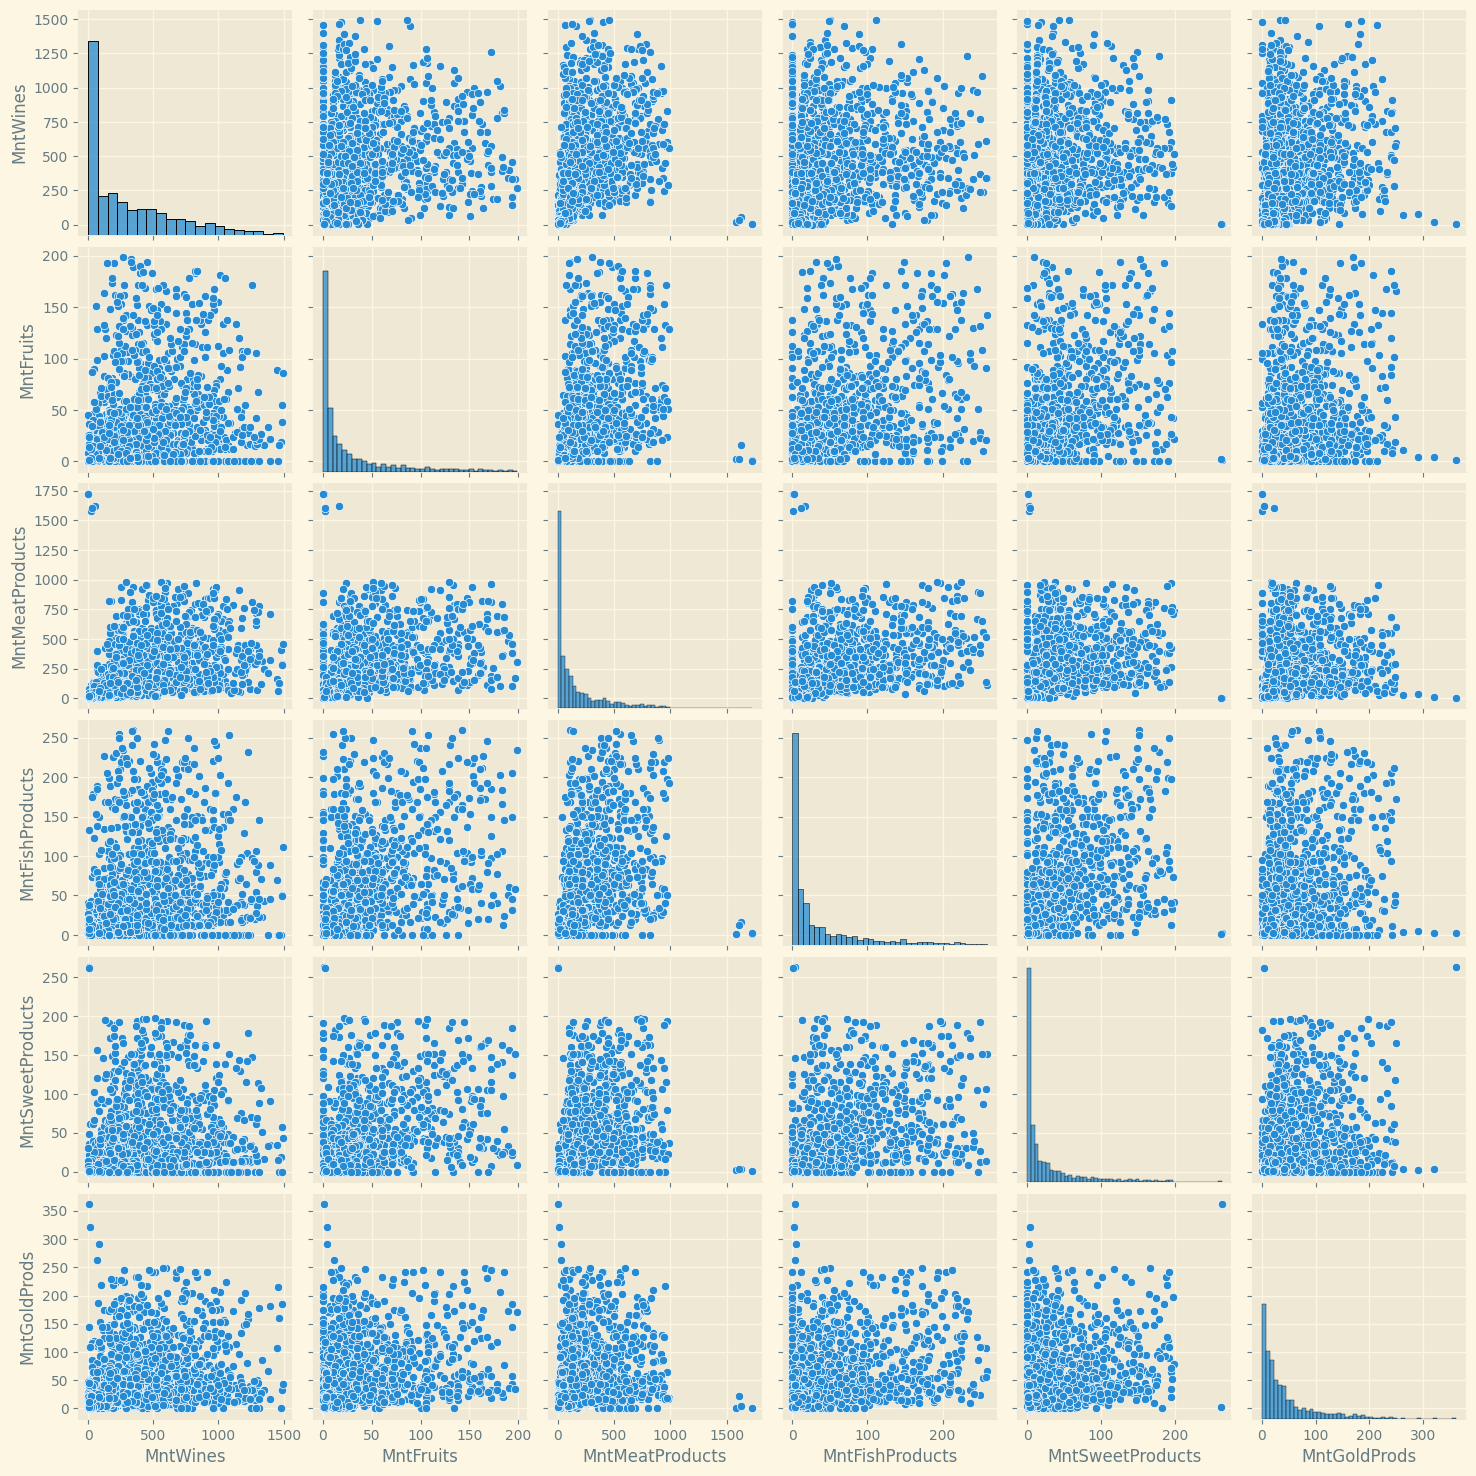

In [111]:
# pair plot
h = sns.pairplot(data_product)

MntWines            MntMeatProducts
MntFruits           MntFishProducts
MntMeatProducts     MntFishProducts
MntFishProducts           MntFruits
MntSweetProducts    MntFishProducts
MntGoldProds        MntFishProducts
dtype: object

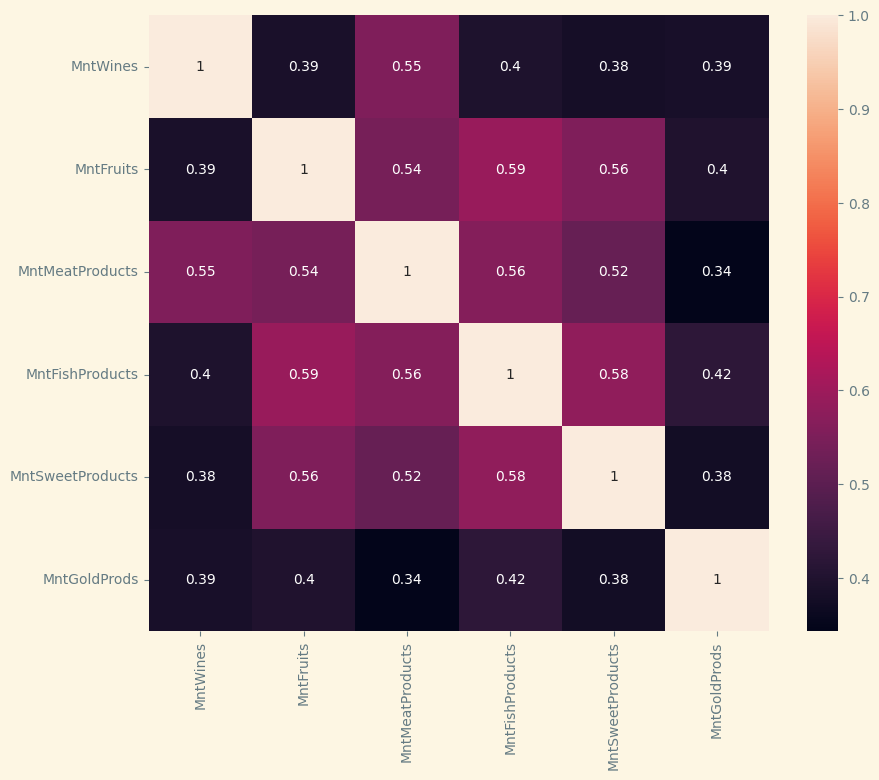

In [112]:
#heat map
corr_mat = data_product.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.abs(), annot=True)

for x in range(len(data_product.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

## Scaling data_product

In [113]:
mms2 = MinMaxScaler()

for col in data_product.columns:
  data_product[col] = mms2.fit_transform(data_product[[col]]).squeeze()

# Promotion featurs

In [114]:
promotion_col = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

data_promotion = data[promotion_col]

In [115]:
data_promotion.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
NumDealsPurchases,2058.0,2.339164,1.942947,0.0,1.0,2.0,3.0,15.0
AcceptedCmp1,2058.0,0.065598,0.247638,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2058.0,0.012634,0.111714,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2058.0,0.073372,0.260810,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2058.0,0.076774,0.266297,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2058.0,0.071914,0.258409,0.0,0.0,0.0,0.0,1.0
Response,2058.0,0.152089,0.359195,0.0,0.0,0.0,0.0,1.0


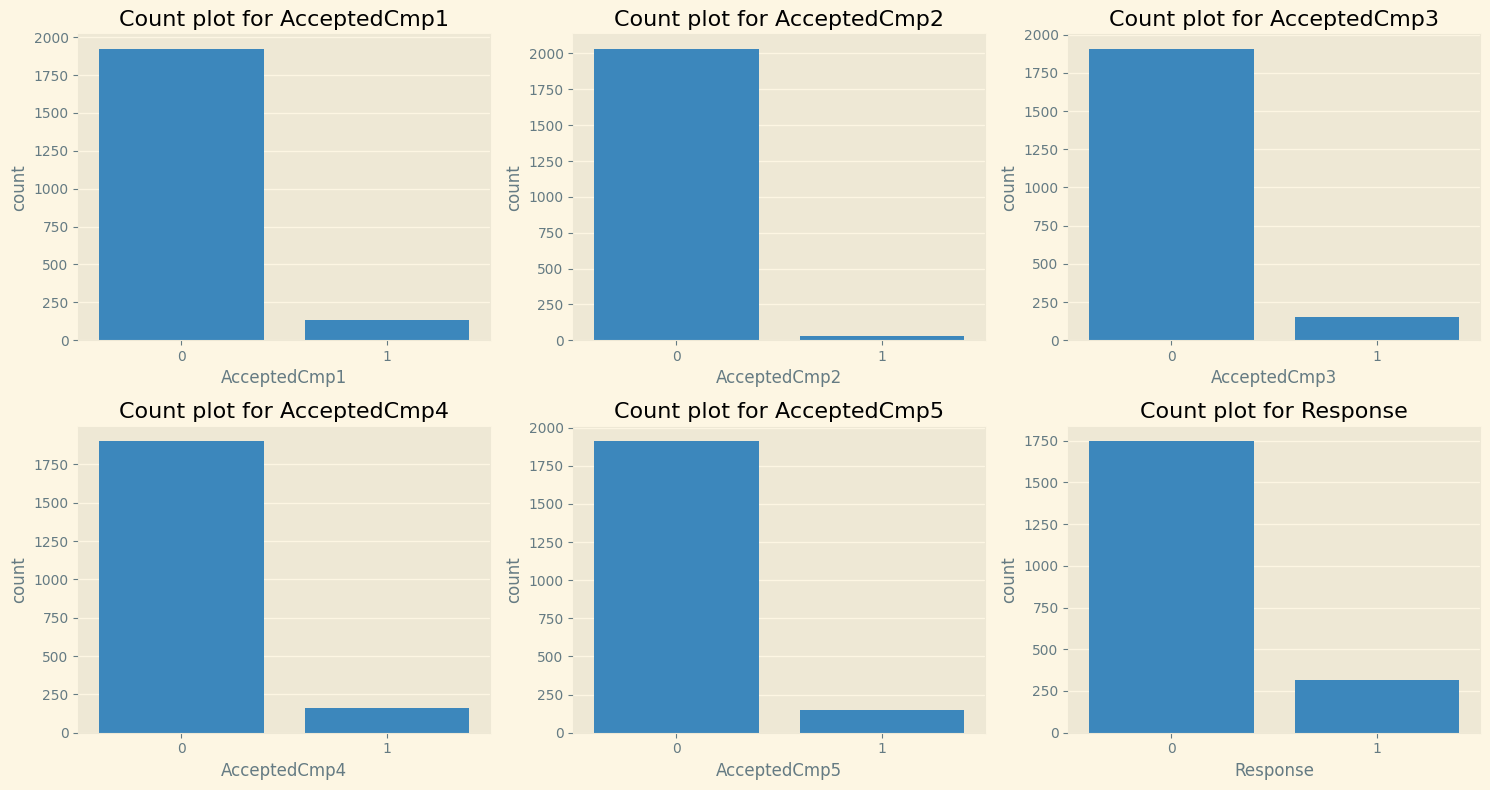

In [116]:
# count plot for nominal features
nominal_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

numerical_columns = [] # ['Income', 'Recency', 'Age', 'Lifetime']

# Set up the matplotlib figure
num_plots = len(nominal_columns) + len(numerical_columns)
num_cols = 3
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(num_cols * 5, num_rows * 4))


# Creating subplots for nominal columns
for i, column in enumerate(nominal_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, data=data_promotion)
    plt.title(f'Count plot for {column}')
    #plt.xticks(rotation=45)  # Rotate the x labels if they overlap

'''
# Creating subplots for numerical columns: you may need to bin the numerical columns
for i, column in enumerate(numerical_columns, 1 + len(nominal_columns)):
    plt.subplot(num_rows, num_cols, i)
    # For numerical columns, let's bin them and then count (like a histogram)
    # Convert the numerical column to categorical bins
    data = pd.cut(data_people[column], bins=10)  # Adjust bins as needed
    sns.countplot(x=data)
    plt.title(f'Count plot for binned {column}')
    plt.xticks(rotation=45)  # Rotate the x labels if they overlap
'''
plt.tight_layout()
plt.show()

<Axes: xlabel='NumDealsPurchases', ylabel='Density'>

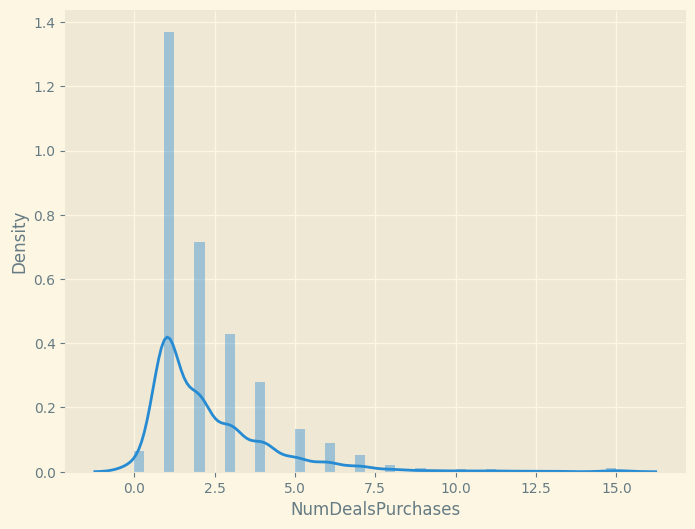

In [117]:
sns.distplot(data_promotion['NumDealsPurchases'])

## Scaling data_promotion

In [118]:
mms3 = MinMaxScaler()

for col in data_promotion.columns:
  data_promotion[col] = mms3.fit_transform(data_promotion[[col]]).squeeze()

# Place features

In [119]:
place_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

data_place = data[place_col]

In [120]:
data_place.describe().T

,count,mean,std,min,25%,50%,75%,max
NumWebPurchases,2058.0,4.098639,2.797577,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2058.0,2.660836,2.933824,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2058.0,5.770651,3.239113,0.0,3.0,5.0,8.0,13.0
NumWebVisitsMonth,2058.0,5.319728,2.439907,0.0,3.0,6.0,7.0,20.0


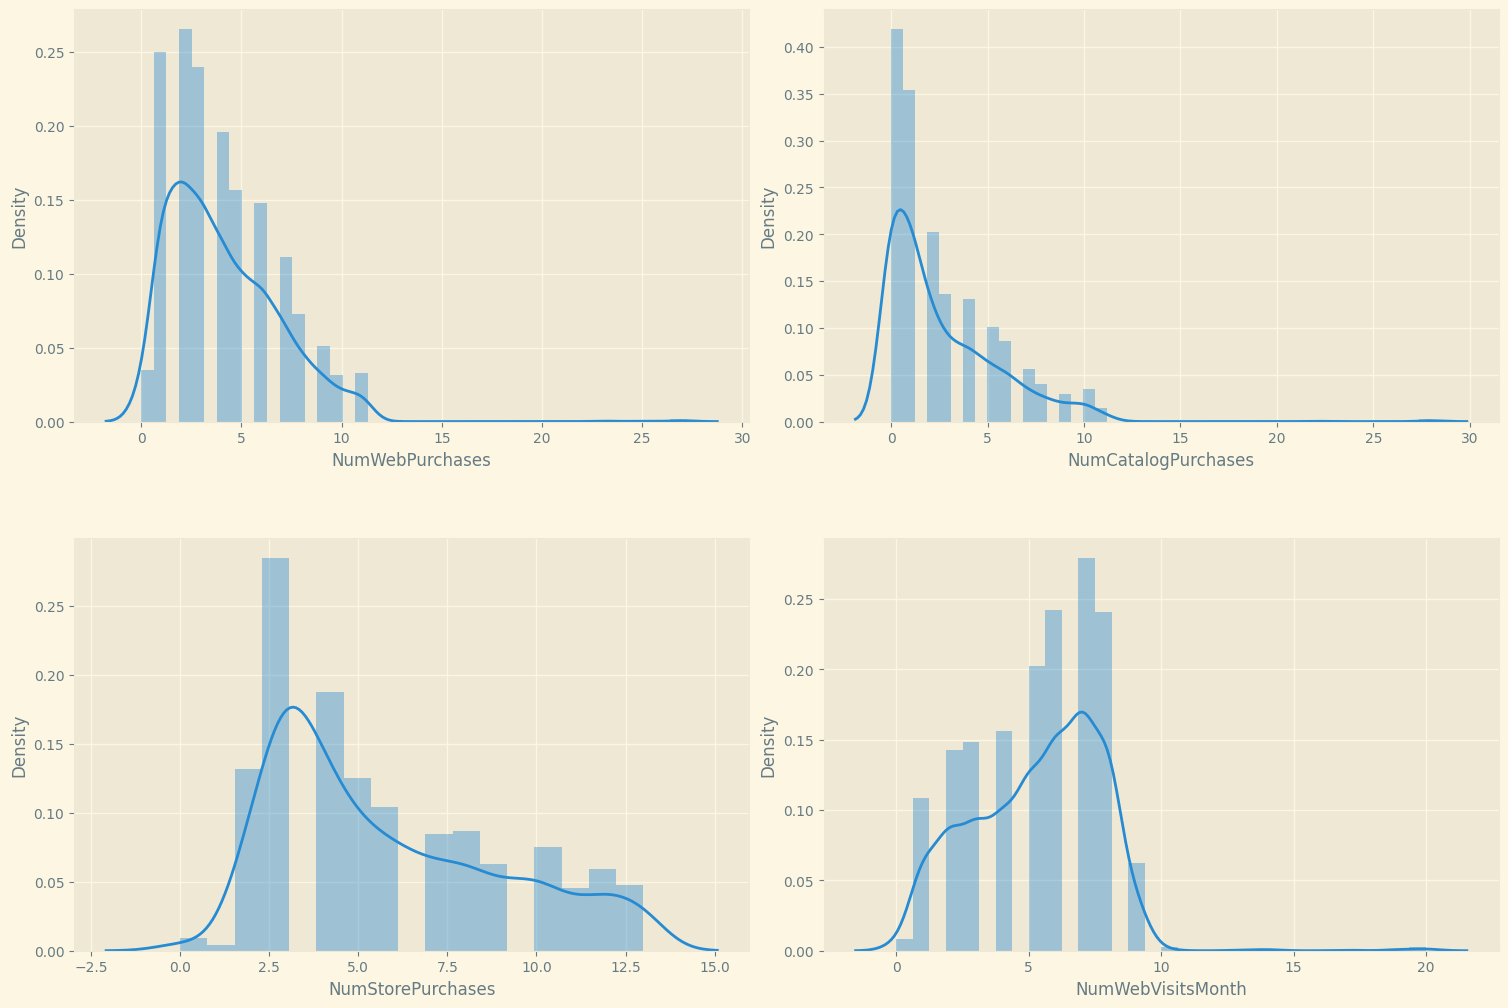

In [121]:
# distribution plot for numerical features
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
index = 0
axs = axs.flatten()
for k, v in data_place.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

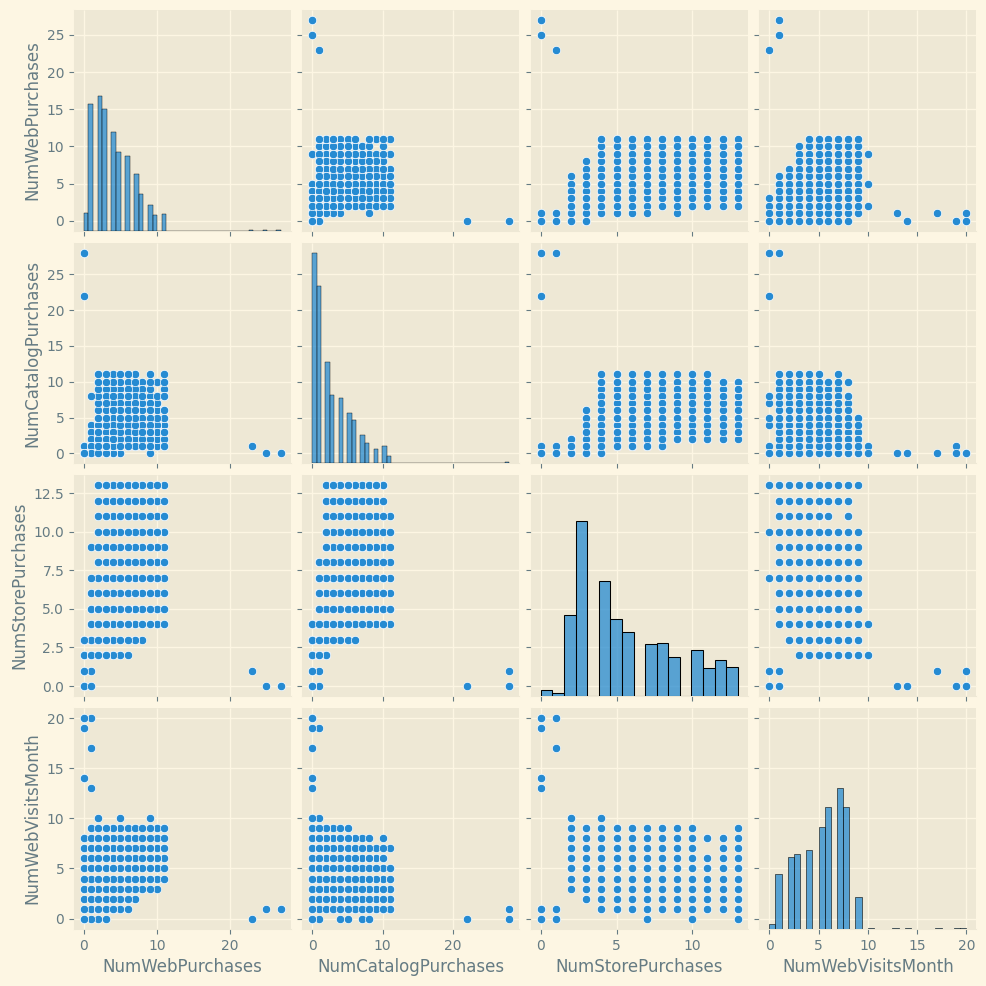

In [122]:
# pair plot
h = sns.pairplot(data_place)

NumWebPurchases          NumStorePurchases
NumCatalogPurchases      NumStorePurchases
NumStorePurchases      NumCatalogPurchases
NumWebVisitsMonth      NumCatalogPurchases
dtype: object

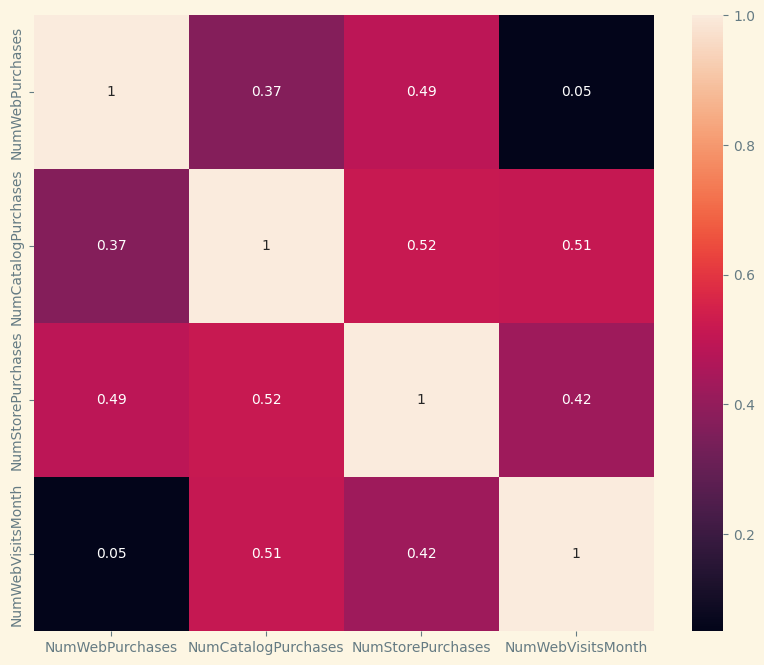

In [123]:
#heat map
corr_mat = data_place.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.abs(), annot=True)

for x in range(len(data_place.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()